# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../croprecommendation_raw.csv')
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Informasi dasar dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Informasi statistik dataset

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Univariate Analysis

fitur numerikal

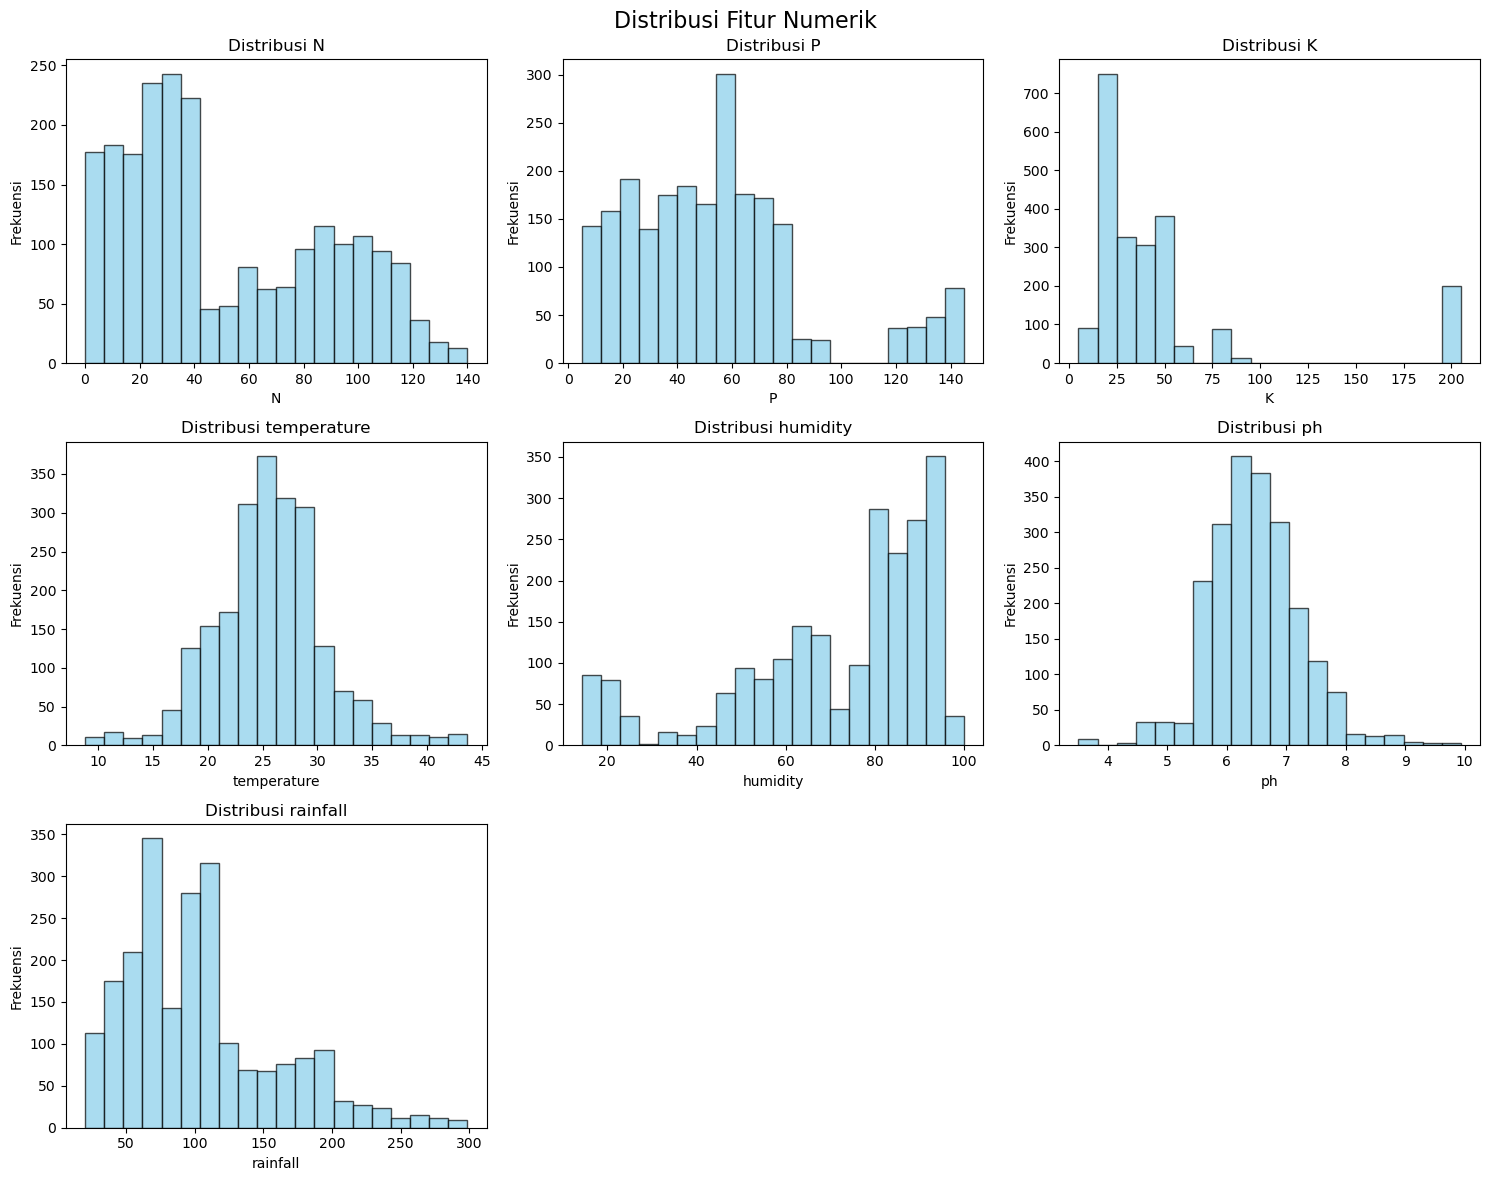

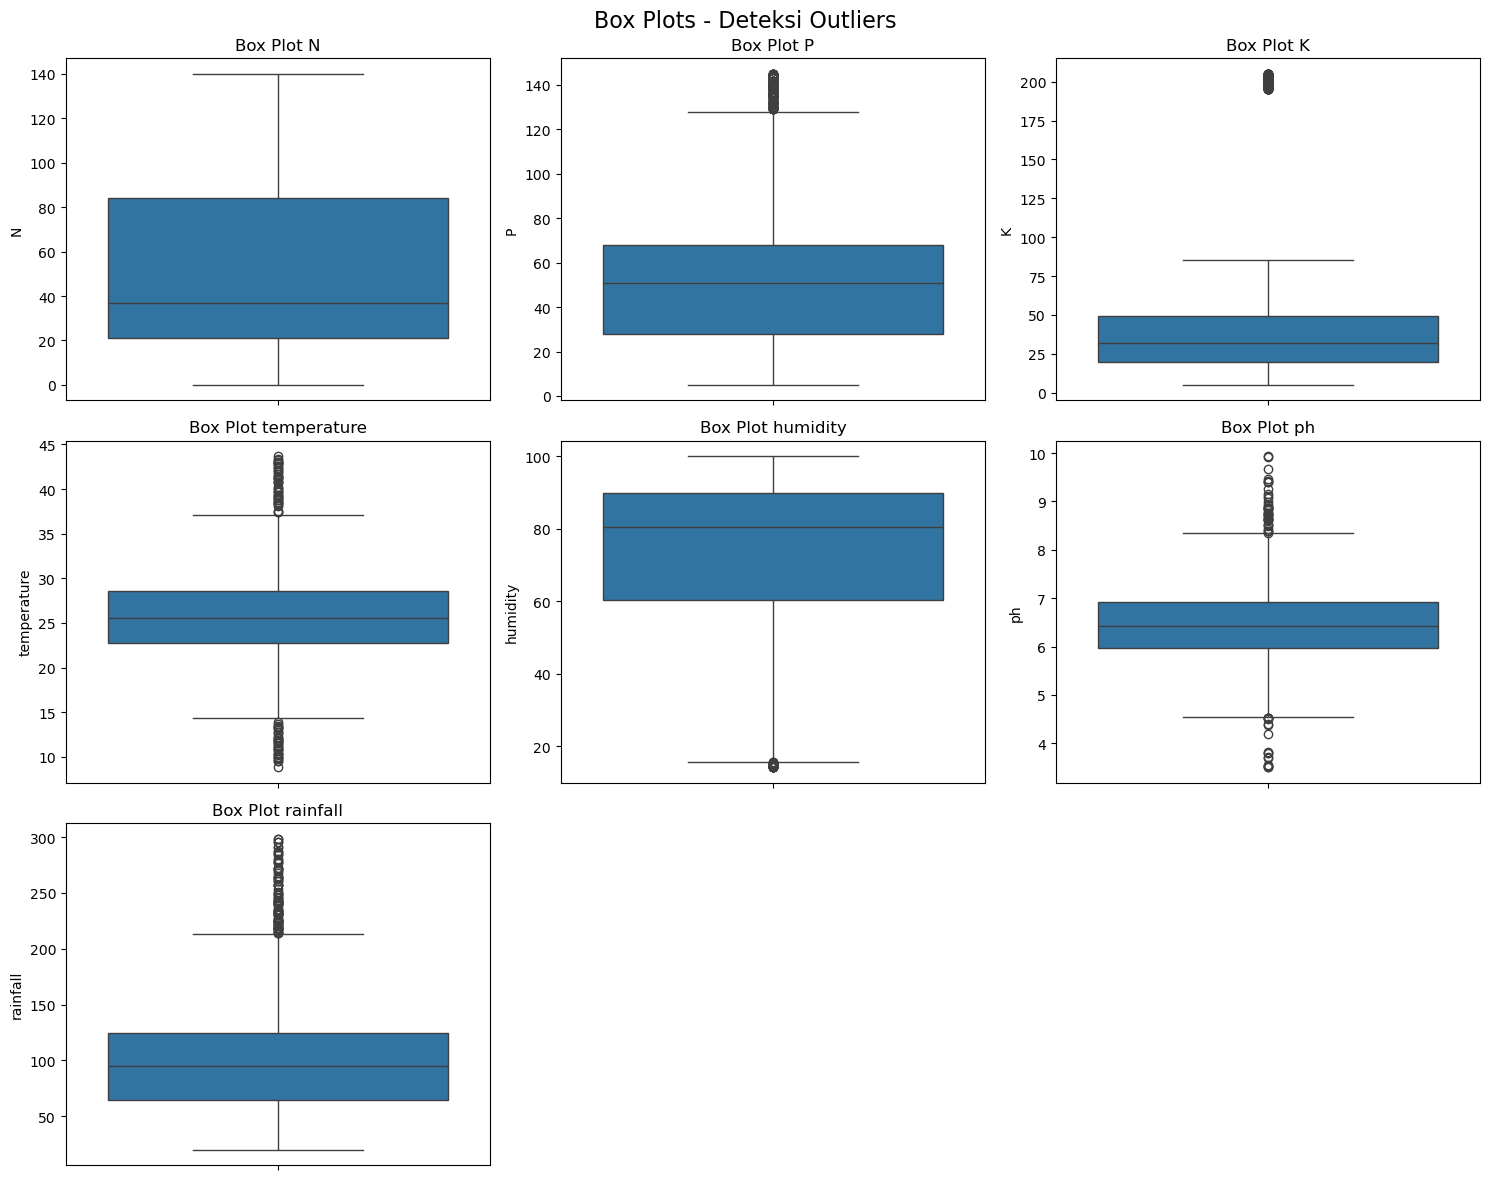

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Distribusi fitur numerik (Histograms)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribusi {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frekuensi')

# Hapus subplot yang tidak digunakan
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# Box plots untuk deteksi outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.boxplot(y=df[col], ax=axes[idx])
        axes[idx].set_title(f'Box Plot {col}')

# Hapus subplot yang tidak digunakan
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Box Plots - Deteksi Outliers', fontsize=16)
plt.tight_layout()
plt.show()

distribusi data numerikal cenderung right skewed dan normal, dengan beberapa fitur yang memiliki outlier

fitur kategorikal


Distribusi Fitur Kategorikal:

label:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64
Persentase distribusi:
label
rice           4.55
maize          4.55
chickpea       4.55
kidneybeans    4.55
pigeonpeas     4.55
mothbeans      4.55
mungbean       4.55
blackgram      4.55
lentil         4.55
pomegranate    4.55
banana         4.55
mango          4.55
grapes         4.55
watermelon     4.55
muskmelon      4.55
apple          4.55
orange         4.55
papaya         4.55
coconut        4.55
cotton         4.55
jute           4.55
coffee         4.55
Name: count, dtype: float64


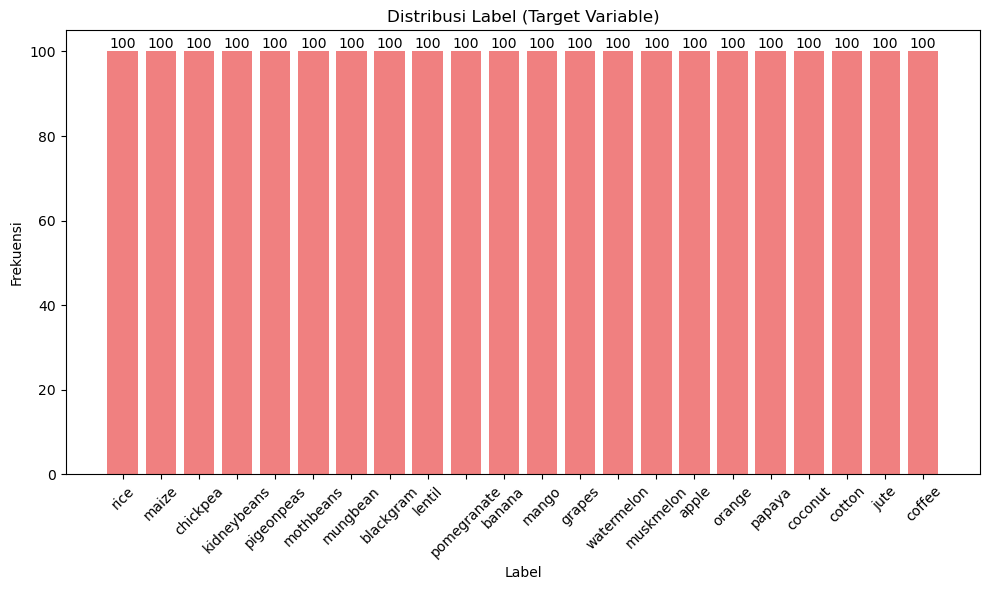

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nDistribusi Fitur Kategorikal:")

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Persentase distribusi:")
    print((df[col].value_counts() / len(df) * 100).round(2))

# Visualisasi distribusi label
plt.figure(figsize=(10, 6))
label_counts = df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values, color='lightcoral')
plt.title('Distribusi Label (Target Variable)')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

# Tambahkan nilai di atas bar
for i, v in enumerate(label_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

distribusi data kategorikal sangatlah merata

Bivariate Analysis

Correlation Matrix:
                 N      P      K  temperature  humidity     ph  rainfall
N            1.000 -0.231 -0.141        0.027     0.191  0.097     0.059
P           -0.231  1.000  0.736       -0.128    -0.119 -0.138    -0.064
K           -0.141  0.736  1.000       -0.160     0.191 -0.170    -0.053
temperature  0.027 -0.128 -0.160        1.000     0.205 -0.018    -0.030
humidity     0.191 -0.119  0.191        0.205     1.000 -0.008     0.094
ph           0.097 -0.138 -0.170       -0.018    -0.008  1.000    -0.109
rainfall     0.059 -0.064 -0.053       -0.030     0.094 -0.109     1.000


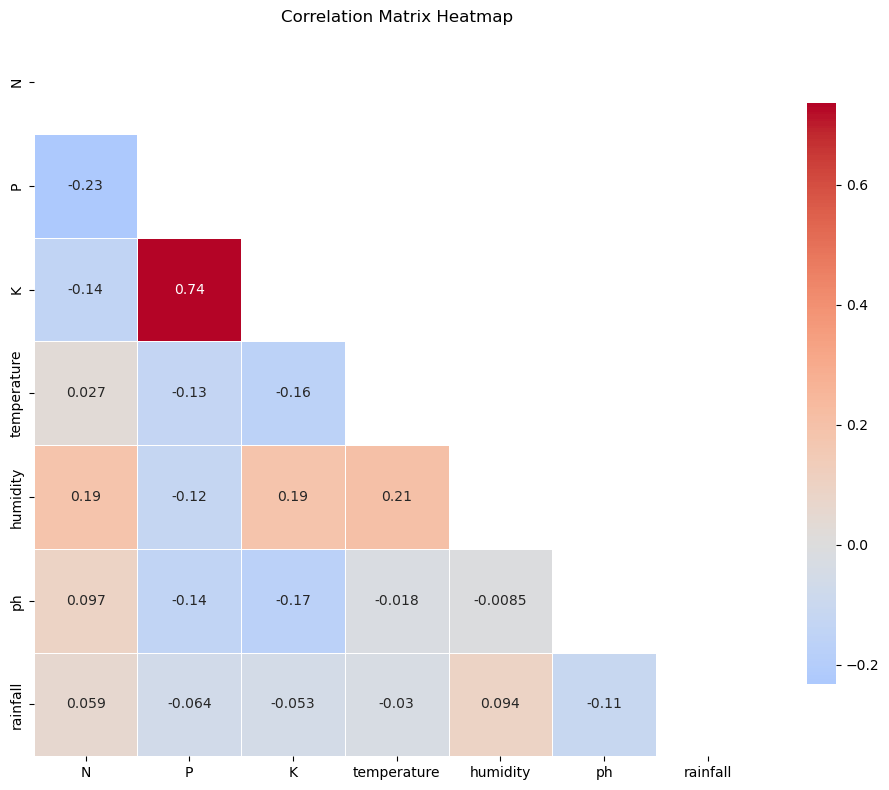


Korelasi tertinggi (absolut):
P - K: 0.736
N - P: -0.231
temperature - humidity: 0.205
K - humidity: 0.191
N - humidity: 0.191


<Figure size 2000x2000 with 0 Axes>

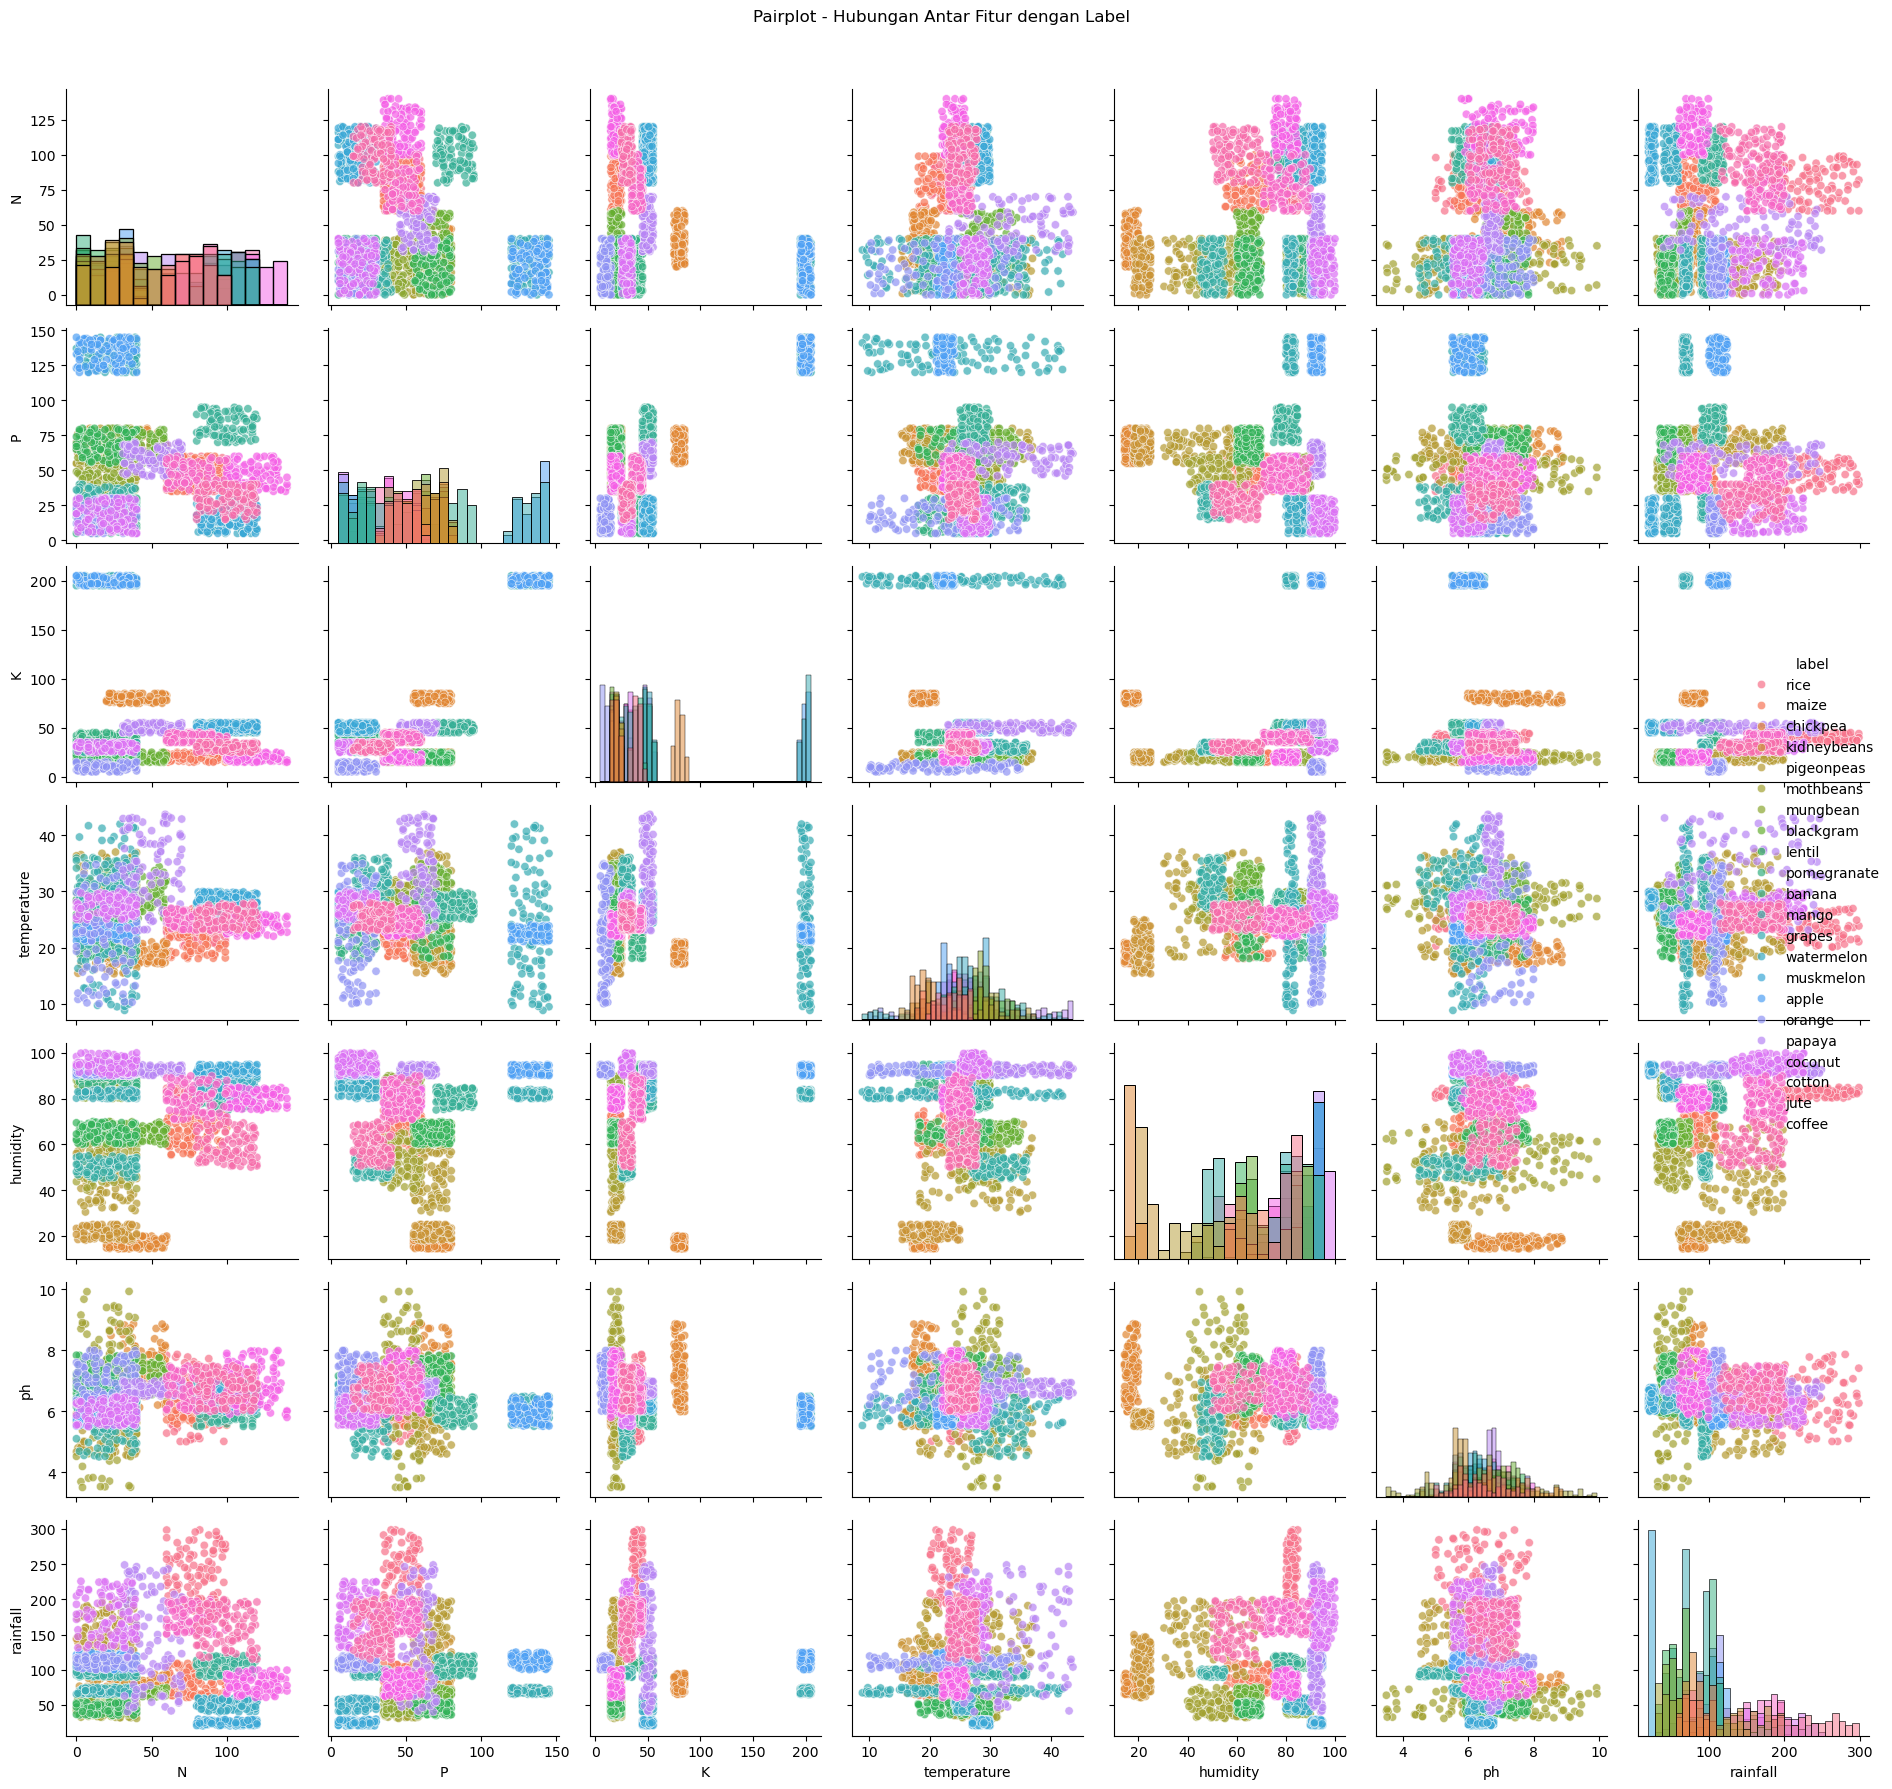

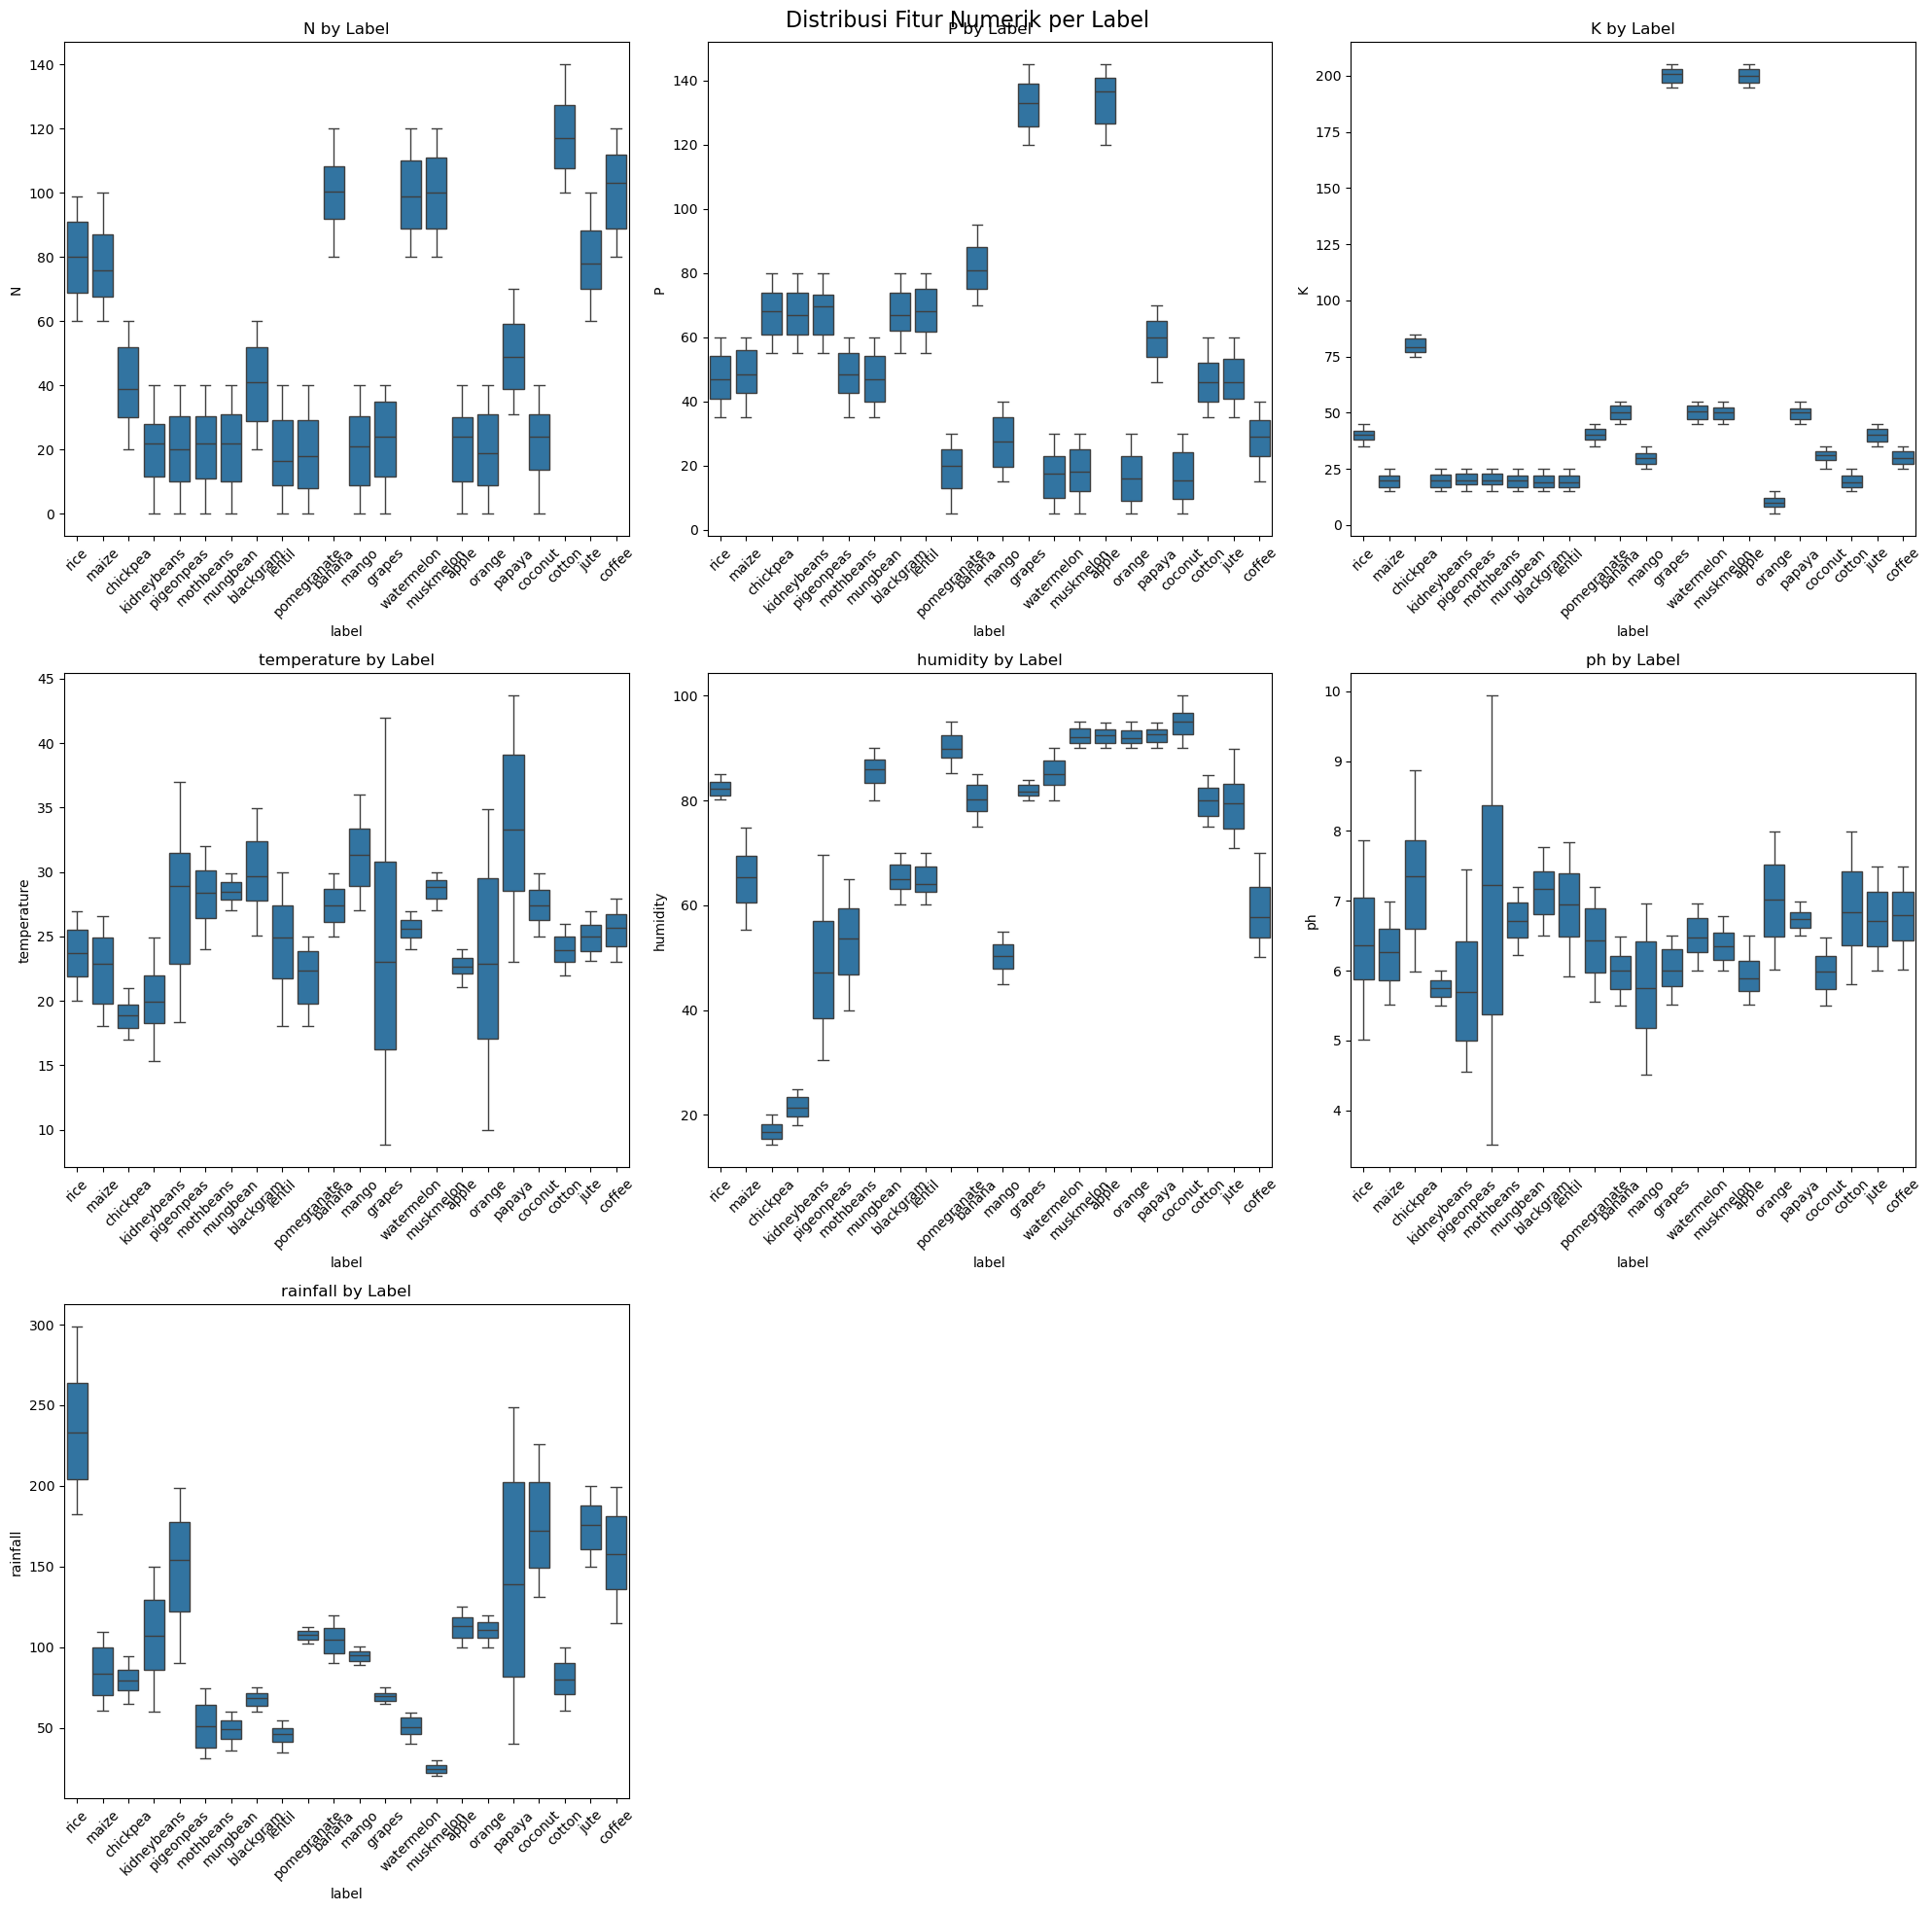

In [10]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(corr_matrix.round(3))

# Heatmap korelasi
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Temukan korelasi tertinggi dan terendah
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
print("\nKorelasi tertinggi (absolut):")
for i in range(min(5, len(corr_pairs))):
    print(f"{corr_pairs[i][0]} - {corr_pairs[i][1]}: {corr_pairs[i][2]:.3f}")

# Pairplot untuk melihat hubungan antar fitur numerik dengan label
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='label', diag_kind='hist', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot - Hubungan Antar Fitur dengan Label', y=1.02)
plt.tight_layout()
plt.show()

# Box plots fitur vs label
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.boxplot(data=df, x='label', y=col, ax=axes[idx])
        axes[idx].set_title(f'{col} by Label')
        axes[idx].tick_params(axis='x', rotation=45)

# Hapus subplot yang tidak digunakan
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribusi Fitur Numerik per Label', fontsize=16)
plt.tight_layout()
plt.show()

kolom P (Phosphorus) dan K (Potassium) memiliki korelasi yang tinggi. tidak ditemukan insight yang menarik dari pairplot dan boxplot.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Data sebelum di preprocess

In [18]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
print(f"Data awal: {df.shape}")

Data awal: (2200, 8)


Menangani Missing Value

In [12]:
processed_df = df.copy()
processed_df = processed_df.dropna()

Menghapus Data Duplikat

In [13]:
processed_df = df.drop_duplicates()

Deteksi dan Penanganan Outlier

In [ ]:
numerical_cols = ['K', 'N', 'P', 'temperature', 'humidity', 'ph', 'rainfall']

for col in numerical_cols:
    Q1 = processed_df[col].quantile(0.25)
    Q3 = processed_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menghitung outliers yang akan dihapus
    outliers_to_remove = len(processed_df[(processed_df[col] < lower_bound) | (processed_df[col] > upper_bound)])
    
    # Hapus outliers
    processed_df = processed_df[
        (processed_df[col] >= lower_bound) & 
        (processed_df[col] <= upper_bound)
    ]
    
    print(f"{col}: {outliers_to_remove} outliers dihapus")

   K: 200 outliers dihapus
   N: 0 outliers dihapus
   P: 0 outliers dihapus
   temperature: 58 outliers dihapus
   humidity: 0 outliers dihapus
   ph: 58 outliers dihapus
   rainfall: 38 outliers dihapus


Normalisasi dan Standarisasi

In [19]:
scaler = MinMaxScaler()
processed_df[numerical_cols] = scaler.fit_transform(processed_df[numerical_cols])

Encoding Data Kategorikal

In [20]:
label_encoder = LabelEncoder()
processed_df['label'] = label_encoder.fit_transform(processed_df['label'])

Setelah preprocessing

In [22]:
print(f"Data akhir: {processed_df.shape}")

Data akhir: (1846, 8)


In [21]:
processed_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.411111,0.4750,0.259066,0.790267,0.500431,0.799151,18
1,0.607143,0.588889,0.4500,0.300649,0.770633,0.641414,0.902891,18
3,0.528571,0.333333,0.4375,0.521029,0.768751,0.626213,0.973780,18
7,0.671429,0.533333,0.4375,0.230962,0.800665,0.293780,0.969888,18
8,0.635714,0.544444,0.4125,0.428817,0.808144,0.548477,0.919470,18
